## Example data Iris

<img src='imgs/q91.jpg' style=''>

<img src='imgs/q93.jpg' style=''>
<img src='imgs/q94.jpg' style=''>
<img src='imgs/q95.jpg' style=''>

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:

#importing data Iris

dataIris = pd.read_csv('./data/Iris.csv')

### Resumo Geral

In [4]:
dataIris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataIris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


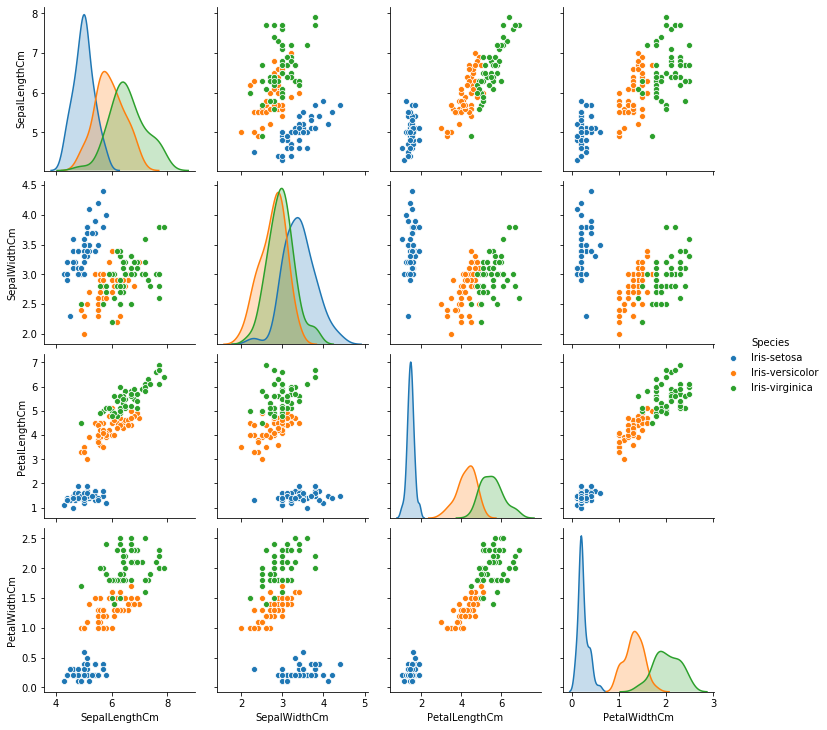

In [7]:

# pairplot by species
sns.pairplot(dataIris, hue='Species', vars=dataIris.columns[1:-1]) #retirando as colunas "Id" e "Species" do scatter plot pairplot
plt.show()

### Rápida análise  (Species = Iris-setosa)

In [8]:

#pegando apenas os dados para os quais Species = 'Iris-setosa'
dataIrisSetosa = dataIris[dataIris['Species'] == 'Iris-setosa'] 

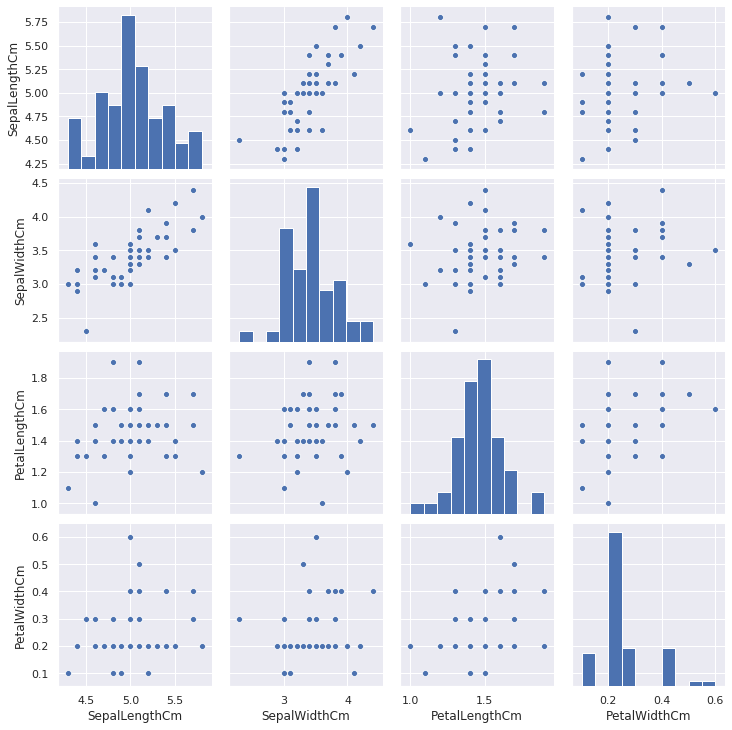

In [9]:

# pair plot variaveis Specied = 'Iris-setosa'
sns.set()
sns.pairplot(dataIrisSetosa, vars=dataIrisSetosa.columns[1:-1])
plt.show()

In [10]:

# resumo das variaveis, retirando a coluna Id
dataIrisSetosa[dataIrisSetosa.columns[dataIrisSetosa.columns != "Id"]].describe()

#O código acima poderia ser facilmente substituido por:
# dataIrisSetosa = dataIrisSetosa.drop(['Id'],axis=1);
# dataIrisSetosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [11]:

dataIrisSetosa2 = dataIrisSetosa.drop(['Id','Species'], axis=1) 
# Retirando as colunas 'Id' e 'Species', para calcular as matriz de covariancia e correlação


In [12]:

matCov = np.cov(dataIrisSetosa2.T) # gerando matriz de covariancia
matCorr = np.corrcoef(dataIrisSetosa2.T) # gerando matriz de correlação

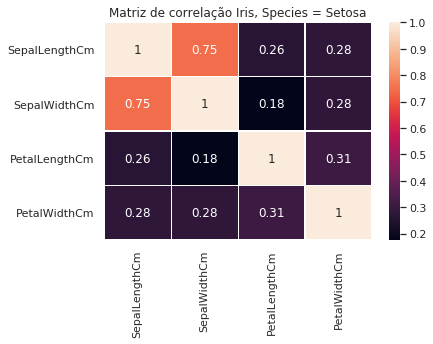

In [13]:

axe = sns.heatmap(matCorr, annot=True, linewidth=0.2, xticklabels=dataIrisSetosa2.columns, yticklabels=dataIrisSetosa2.columns )
axe.set_title('Matriz de correlação Iris, Species = Setosa')
plt.show()
# Para mais detalhes sobre a matriz de correlação, sua interpretação, [5], fornece um bom resumo


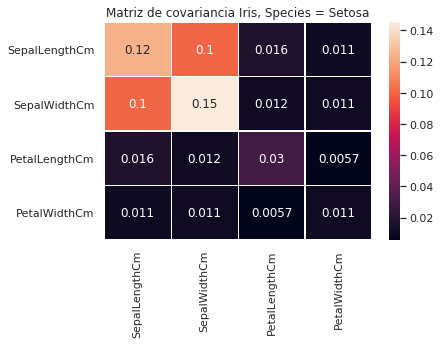

In [14]:

axe = sns.heatmap(matCov, annot=True, linewidth=0.2, xticklabels=dataIrisSetosa2.columns, yticklabels=dataIrisSetosa2.columns )
axe.set_title('Matriz de covariancia Iris, Species = Setosa')
plt.show()
# Um resumo rápido sobre a matriz de covariancia é encontrado em [6]


- Forneça uma estimativa para o vetor μ e para a matriz Σ e ρ.<br>
As estimativas para, μ, são obtidas logo abaixo. Σ e ρ, matriz de covariancia e correlação, respectivamente, são mostradas logo acima, usando plot do tipo heatmap.

In [15]:

#Obtendo o vetor com as médias, estimativas para μ
mu = dataIrisSetosa2.mean(); mu

SepalLengthCm    5.006
SepalWidthCm     3.418
PetalLengthCm    1.464
PetalWidthCm     0.244
dtype: float64

- A partir da matriz de correlação entre os pares de v.a.’s (e do plot de dispersão dos pontos),quais as variáveis que são mais correlacionadas?  E quais são menos correlacionadas?<br>

Observando a matriz de correlação, plotada com heatmap, e o cruzamento das variáveis, plotada com pairplot, podemos perceber uma<b> maior correlação entre as variáveis SepalLengthCm e SepalWidthCm</b>, a correlação é positiva, próxima de 0.75, o que indica que a medida que os valores de uma cresce existe tendência dos valores da outra variável também crescer.

- Obtenha a distribuição MARGINAL do sub-vetor X*= (X1,X2), o comprimento e largurada sépala.<br>

Pelo problema proposto, é dito que X apresenta distribuição conjunta normal multivariada, com dimensão 4 com parâmetros μ = (μ1,μ2,μ3,μ4) e matriz de covariância Σ de dimensão 4×4. Desse modo temos:<br><br>

In [33]:
print('X* = (X1, X2) ~ N(μ(1,2), Σ) = N(μ({0:.2f},{1:.2f}), \nΣ = \n{2})'.format(mu[0],mu[1], np.round(matCov[:2,:2],3)))

X* = (X1, X2) ~ N(μ(1,2), Σ) = N(μ(5.01,3.42), 
Σ = 
[[0.124 0.1  ]
 [0.1   0.145]])


Ou seja, X* = (X1, X2) apresenta distribuição normal com parâmetros μ(1,2) e Σ que correspondem, respectivamente, as médias das variáveis X1 e X2 com matriz de covariancia entre elas dado por Σ.

- Obtenha a distribuição CONDICIONAL do sub-vetor X* = (X1,X2) quando são conhecidosos valores x3 e x4 das v.a.’s (X3,X4).  Obtenha esta distribuição para dois valores genéricos x3 e x4.  A seguir use dois valores específicos: x3 = 1.8 e x4 = 0.6, dois valores relativamente altos para  estas  variáveis.   Compare DP1= $\sqrt{V(X1)}$  com $\sqrt{V(X1|X3= 1.8,X4= 0.6)}$,  o  desvio padrão da variável X1 condicionada nos valores de X3 e X4.

Para uma distribuição normal multivariada podemos obter uma distribuição CONDICIONAL como mostrado logo abaixo, para mais detalhes consulte distribuição normal multivariada em [8]. Abaixo é executado isso.<br><br>
<b>Observe, no que é executado abaixo, que os índices da matriz $\mu$  e $\Sigma$ não correspondem aos índices das v.a.s aleátorias, mas sim ligados aos blocos da matriz. Observar isso é extremamente importante para o entendimento do que é feito abaixo</b>. 

<img src='imgs/q96.png' style=''>

logo, temos:<br><br>
$$ 
\begin{pmatrix} 
X1 \\ X2
\end{pmatrix}
\Big | 
\begin{pmatrix}
X3 = x3 \\ X4 = x4
\end{pmatrix}
\sim N(\boldsymbol{\overline{\mu}},\boldsymbol{\overline{\Sigma}}), \\ 
$$
<br><br>
$
\boldsymbol{\overline{\mu} = \mu_{1} + \Sigma_{1 2}\Sigma_{2 2}^{-1}(a - \mu_{2}) } = 
\begin{pmatrix}
\mu_{1} \\ \mu_{2}
\end{pmatrix} +  \boldsymbol{\Sigma_{1 2}\Sigma_{2 2}^{-1}}
\begin{pmatrix}
x3 - \mu_{3} \\ x4 - \mu_{4}
\end{pmatrix} = 
$

<img src='imgs/q97.png' style=''>

Para x3 = 1.8 e x4 = 0.6, temos:<br>
$$
\boldsymbol{\overline{\mu}} = 
$$<img src='imgs/q98.png' style=''>

Para $\boldsymbol{\overline{\Sigma}},$ temos:<br><br>
$ 
\boldsymbol{\overline{\Sigma} = \Sigma_{1 1} - \Sigma_{1 2}\Sigma_{2 2}^{-1}\Sigma_{2 1}} = 
$
<img src='imgs/q99.png' style=''>

In [88]:
print('Desvio padrão SepalLengthCm, (Species = Setosa): {0:.3f}'.format(dataIrisSetosa2['SepalLengthCm'].std()))


Desvio padrão SepalLengthCm, (Species = Setosa): 0.352


In [90]:
x3 = 1.4
x4 = 0.2
query = 'PetalLengthCm == ' + str(x3) + ' and PetalWidthCm == ' + str(x4)

dataQueryX3X4 = dataIrisSetosa2.query(query)


print('Desvio padrão (X1 | X3 = {0}, X4 = {1}): {2:.3f}'.format(x3,x4, dataQueryX3X4['SepalLengthCm'].std()))


Desvio padrão (X1 | X3 = 1.4, X4 = 0.2): 0.342


Observe os valores utilizado para x3 e x4 acima, foram escolhidos valores arbitrários, x3 = 1.8, x4 = 0.6, retornavam conjunto vazio. O ponto é, como mostrado acima, no tópico <b>distribuições condicionais</b> de [8], ao se calcular a distribuição condicional, a variancia é alterada embora ela não dependa dos valores especificos de x3 e x4, para esse caso.

- Obtenha agora a distribuição CONDICIONAL do sub-vetor X*= (X1,X2) quando  ́e conhecido apenas o valor de X3.<br><br>
Fazemos de forma similar ao feito acima.

$$ 
\begin{pmatrix} 
X1 \\ X2
\end{pmatrix}
\Big | 
\begin{pmatrix}
X3 = x3
\end{pmatrix}
\sim N(\boldsymbol{\overline{\mu}},\boldsymbol{\overline{\Sigma}}), \\ 
$$
<br><br>
$
\boldsymbol{\overline{\mu} = \mu_{1} + \Sigma_{1 2}\Sigma_{2 2}^{-1}(x3 - \mu_{2}) } = 
\begin{pmatrix}
\mu_{1} \\ \mu_{2}
\end{pmatrix} +  \boldsymbol{\Sigma_{1 2}\Sigma_{2 2}^{-1}}
\begin{pmatrix}
x3 - \mu_{3} 
\end{pmatrix} = 
$
<img src='imgs/q910.png' style=''>

Para $\boldsymbol{\overline{\Sigma}},$ temos:<br><br>
$ 
\boldsymbol{\overline{\Sigma} = \Sigma_{1 1} - \Sigma_{1 2}\Sigma_{2 2}^{-1}\Sigma_{2 1}} = 
$
<img src='imgs/q911.png' style=''>

- Obtenha também distribuição CONDICIONAL do sub-vetor X* = (X1,X2) quando é conhecido apenas o valor de X4.

A resolução desse problema é extremamente semelhante ao acima, logo, temos:

$$ 
\begin{pmatrix} 
X1 \\ X2
\end{pmatrix}
\Big | 
\begin{pmatrix}
X4 = x4
\end{pmatrix}
\sim N(\boldsymbol{\overline{\mu}},\boldsymbol{\overline{\Sigma}}), \\ 
$$
<br><br>
$
\boldsymbol{\overline{\mu} = \mu_{1} + \Sigma_{1 2}\Sigma_{2 2}^{-1}(x4 - \mu_{2}) } = 
\begin{pmatrix}
\mu_{1} \\ \mu_{2}
\end{pmatrix} +  \boldsymbol{\Sigma_{1 2}\Sigma_{2 2}^{-1}}
\begin{pmatrix}
x4 - \mu_{4} 
\end{pmatrix} = 
$
<img src='imgs/q912.png' style=''>

Para $\boldsymbol{\overline{\Sigma}},$ temos:<br><br>
$ 
\boldsymbol{\overline{\Sigma} = \Sigma_{1 1} - \Sigma_{1 2}\Sigma_{2 2}^{-1}\Sigma_{2 1}} = 
$
<img src='imgs/q913.png' style=''>

- Comparando as três últimas respostas que você forneceu, qual das duas variáveis isoladamente, X3 ou X4, diminui a incerteza acerca de X2 mais fortemente?  Isto é, se você tivesse de escolher apenas uma delas, X3 ou X4, qual você iria preferir se seu objetivo fosse predizer o valor de X2?

Lembre-se que a diagonal da matriz de covariância representa as variâncias das próprias variáveis.<br>
Observando os resultados acima, ao ser calculado a matriz de covariância de (X1, X2) condicionada a X3 e depois a X4, a variância resultante de X2 equivale a 0.136 quando condicionada a X4 e 0.139 quando condicionada a X3, logo temos:<br><br>
$V(X2|X4 = 0.6) = 0.136 < 0.139 = V(X2|X3 = 1.8)$,<br><br> portando, conhecer X4 diminui a incerteza sobre X2, sendo assim, entre X3 e X4, X4 é a mais indicada para predizer X2. Como discutido acima, os valores específicos para X3 = x3 e X4 = x4, não influenciam no resultado da variância, ou seja, as variâncias condicionais não variam com x3 ou x4. Para mais detalhes consulte [8], [10], ou pesquise mais sobre matriz de covariância.

- Considere a melhor preditora para X2 que você escolheu, dentre X3 ou X4, na questão anterior. Digamos que tenha sido X4.  Avalie quanto conhecer a outra variável (neste caso, X3) reduz ADICIONALMENTE a incerteza acerca de X3.  Isto é, compare V(X2|X4) com V(X2|X3,X4).

Podemos observar que:<br><br>
0.134 = $V(X2|X3 = 1.8,X4 = 0.6) < 0.136 = V(X2|X4) < 0.144 = V(X2)$,<br><br>
portando adicionar o conhecimento sobre X3 reduz, mesmo que bem pouco, a incerteza sobre X2.

## References

[1]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/LivroDeExerciciosFECD.pdf
<br>
[2]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/FECD.pdf
Cap. Gaussiana Multivariada
<br>
[3]https://www.kaggle.com/saurabh00007/iriscsv
<br>
[4]https://seaborn.pydata.org/generated/seaborn.pairplot.html
<br>
[5]https://rstudio-pubs-static.s3.amazonaws.com/437792_df39a5ff0a55491fb71f0f4a0f5cd0bf.html
<br>
[6]https://support.minitab.com/pt-br/minitab/19/help-and-how-to/statistics/basic-statistics/how-to/covariance/interpret-the-results/key-results/
<br>
[7]https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
<br>
[8]https://pt.qwe.wiki/wiki/Multivariate_normal_distribution#Likelihood_function
<br>
[9]https://www.overleaf.com/learn/latex/line_breaks_and_blank_spaces
<br>